In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import optuna

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc,matthews_corrcoef, precision_recall_curve,roc_auc_score




In [32]:
with open("optim_param/optim_DNN_1_params.json", "r") as f:
    DNN_1_params = json.load(f)

with open("optim_param/optim_DNN_2_params.json", "r") as f:
    DNN_2_params = json.load(f)

with open("optim_param/optim_DNN_3_params.json", "r") as f:
    DNN_3_params = json.load(f)

with open("optim_param/optim_DNN_4_params.json", "r") as f:
    DNN_4_params = json.load(f)

with open("optim_param/optim_DNN_5_params.json", "r") as f:
    DNN_5_params = json.load(f)

with open("optim_param/optim_DNN_6_params.json", "r") as f:
    DNN_6_params = json.load(f)

with open("optim_param/optim_DNN_7_params.json", "r") as f:
    DNN_7_params = json.load(f)

with open("optim_param/optim_ResNet_params.json", "r") as f:
    ResNet_params = json.load(f)

with open("optim_param/optim_FTTansformer_params.json", "r") as f:
    FTTransformer_params = json.load(f)

In [33]:
class DNN_1(nn.Module):
    def __init__(self, input_dim, dropout_rate=DNN_1_params["dropout"]):
        super(DNN_1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.layer2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.layer3 = nn.Linear(16, 8)
        self.bn3 = nn.BatchNorm1d(8)
        self.layer4 = nn.Linear(8, 4)
        self.bn4 = nn.BatchNorm1d(4)
        self.output_layer = nn.Linear(4, 1)

        self.dropout = nn.Dropout(dropout_rate)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))  
        x = self.dropout(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn3(self.layer3(x)))  
        x = self.dropout(x)

        x = torch.relu(self.bn4(self.layer4(x))) 
        x = self.dropout(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [34]:
class DNN_2(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_2_params["dropout1"],dropout2=DNN_2_params["dropout2"],dropout3=DNN_2_params["dropout3"],dropout4=DNN_2_params["dropout4"]):
        super(DNN_2, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16,8)
        self.layer4 = nn.Linear(8,4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)


        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        self.dropout3 = nn.Dropout(dropout3)
        self.dropout4 = nn.Dropout(dropout4)

        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout3(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout4(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [35]:
class DNN_3(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_3_params["dropout1"],dropout2=DNN_3_params["dropout2"]):
        super(DNN_3, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
    

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [36]:
class DNN_4(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_4_params["dropout1"],dropout2=DNN_4_params["dropout2"]):
        super(DNN_4, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [37]:
class DNN_5(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_5_params["dropout1"],dropout2=DNN_5_params["dropout2"]):
        super(DNN_5, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [38]:
class DNN_6(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_6_params["dropout1"],dropout2=DNN_6_params["dropout2"]):
        super(DNN_6, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
    

        x = torch.relu(self.bn3(self.layer3(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn4(self.layer4(x)))
        
        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [39]:
class DNN_7(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_7_params["dropout1"],dropout2=DNN_7_params["dropout2"]):
        super(DNN_7, self).__init__()
        self.layer1 = nn.Linear(input_dim,32)
        self.layer2 = nn.Linear(32,16)
        self.layer3 = nn.Linear(16, 8)
        self.layer4 = nn.Linear(8, 4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(32)
        self.bn2=nn.BatchNorm1d(16)
        self.bn3=nn.BatchNorm1d(8)
        self.bn4=nn.BatchNorm1d(4)

        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn3(self.layer3(x)))

        x = torch.relu(self.bn4(self.layer4(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x
    

In [40]:
class FTTransformer(nn.Module):
    def __init__(self, input_dim, num_classes=1, embed_dim=FTTransformer_params["embed_dim"], num_heads=FTTransformer_params["num_heads"], num_layers=FTTransformer_params["num_layers"], dropout=FTTransformer_params["dropout"]):
        super(FTTransformer, self).__init__()
        self.embedding = nn.Linear(input_dim, embed_dim)
        self.embedding_dropout = nn.Dropout(dropout)  # 埋め込み層後のDropout
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dropout=dropout)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, num_classes)
        self.output_dropout = nn.Dropout(dropout)  # 出力層前のDropout

    def forward(self, x):
        x = self.embedding(x)
        x = self.embedding_dropout(x)  # Dropoutを埋め込み層後に適用
        x = x.unsqueeze(1)  # [batch_size, 1, embed_dim]
        x = self.transformer(x)
        x = x.mean(dim=1)  # 平均プーリング
        x = self.output_dropout(x)  # Dropoutを適用
        x = self.fc(x)
        x = torch.sigmoid(x)  # 2値分類用のシグモイド活性化
        return x


In [41]:
class ResidualBlock(nn.Module):
    def __init__(self, input_dim, hidden_dim,dropout1,dropout2):
        super(ResidualBlock, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)
        self.dropout1=nn.Dropout(dropout1)
        
        self.fc2 = nn.Linear(hidden_dim, input_dim)
        self.bn2 = nn.BatchNorm1d(input_dim)
        self.dropout2=nn.Dropout(dropout2)

    def forward(self, x):
        residual = x  # 入力を保存 (ショートカット)
        out = torch.relu(self.bn1(self.fc1(x)))
        out=self.dropout1(out)

        out = self.bn2(self.fc2(out))
        out=self.dropout2(out)

        out += residual  # ショートカット接続
        return torch.relu(out)


In [42]:
class ResNetBinaryClassifier(nn.Module):
    def __init__(self, input_dim, num_blocks=ResNet_params["num_blocks"], hidden_dim=ResNet_params["hidden_dim"], dropout1=ResNet_params["dropout1"], dropout2=ResNet_params["dropout2"]):
        super(ResNetBinaryClassifier, self).__init__()
        self.blocks = nn.Sequential(
            *[ResidualBlock(input_dim, hidden_dim, dropout1, dropout2) for _ in range(num_blocks)]
        )
        self.output_layer = nn.Linear(input_dim, 1)  # 出力層

    def forward(self, x):
        x = self.blocks(x)
        x = torch.sigmoid(self.output_layer(x))  # 2値分類用シグモイド
        return x

In [44]:
df=pd.read_csv('learning_data.csv',index_col=0)

X=df.drop(columns='dengue',axis=1).values
y=df['dengue'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_test_tensor=torch.tensor(X_test, dtype=torch.float32)
y_test_tensor=torch.tensor(y_test, dtype=torch.float32)

In [45]:
# デバイス設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model_paths = [
    "model_params/DNN_1.pth",
    "model_params/DNN_2.pth",
    "model_params/DNN_3.pth",
    "model_params/DNN_4.pth",
    "model_params/DNN_5.pth",
    "model_params/DNN_6.pth",
    "model_params/DNN_7.pth",
    "model_params/FTTransformer.pth",
    "model_params/ResNet.pth",
    ]

model_classes = {0: DNN_1,
                 1: DNN_2,
                 2: DNN_3,
                 3: DNN_4,
                 4: DNN_5,
                 5: DNN_6,
                 6: DNN_7,
                 7:FTTransformer,
                 8:ResNetBinaryClassifier
                 }

models=[]

for i, path in enumerate(model_paths):
    if i in model_classes:
        model = model_classes[i](input_dim=X_train.shape[1]).to(device)
        model.load_state_dict(torch.load(path, map_location=device))
        model.eval()
        models.append(model)

/tmp/ipykernel_41320/1801429464.py:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(path, map_location=device))
/home/gonken/anaconda3/envs

In [46]:
train_outputs = []
test_outputs = []

with torch.no_grad():
    for model in models:
        model.eval()
        
        train_output = model(X_train_tensor.to(device))
        train_outputs.append(train_output)
        
        # テストデータの出力
        test_output = model(X_test_tensor.to(device))
        test_outputs.append(test_output)

train_DL_features = torch.cat(train_outputs, dim=1)  
test_DL_features = torch.cat(test_outputs, dim=1) 

# 出力形状の確認
print(f"Train DL Features Shape: {train_DL_features.shape}")
print(f"Test DL Features Shape: {test_DL_features.shape}")


Train DL Features Shape: torch.Size([3508, 9])
Test DL Features Shape: torch.Size([878, 9])


In [47]:
train_DL_features_np = train_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(train_DL_features_np.reshape(-1, train_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=6,random_state=-0)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=3, random_state=0)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"train_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
train_standardized_features = scaler_standard.fit_transform(all_features)

print(f"train_standardized_features.shape: {train_standardized_features.shape}")

all_features.shape: (3508, 20)
train_DL_features_np.shape: (3508, 9)
train_standardized_features.shape: (3508, 20)


In [48]:
test_DL_features_np = test_DL_features.cpu().numpy()

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(test_DL_features_np.reshape(-1, test_DL_features_np.shape[-1]))

# KMeans クラスタリング
kmeans = KMeans(n_clusters=6, random_state=0)
kmeans_labels = kmeans.fit_predict(normalized_features)

# クラスタリング特徴量を修正
cluster_features = kmeans_labels.reshape(-1, 1) 

# PCA（主成分分析）
pca = PCA(n_components=6,random_state=0)
pca_features = pca.fit_transform(normalized_features)  

# t-SNE
tsne = TSNE(n_components=3, random_state=0)
tsne_features = tsne.fit_transform(normalized_features) 

# 距離から類似度を計算
distance_matrix = cdist(normalized_features, normalized_features, metric='euclidean')
similarity_features = 1 / (1 + distance_matrix) 

# 距離から類似度の平均特徴量を生成
similarity_features_mean = similarity_features.mean(axis=1).reshape(-1, 1) 

all_features = np.hstack([normalized_features,cluster_features,pca_features,tsne_features,similarity_features_mean])

print(f"all_features.shape: {all_features.shape}")
print(f"test_DL_features_np.shape: {train_DL_features_np.shape}")

scaler_standard = StandardScaler()
test_standardized_features = scaler_standard.fit_transform(all_features)

print(f"test_standardized_features.shape: {test_standardized_features.shape}")

all_features.shape: (878, 20)
test_DL_features_np.shape: (3508, 9)
test_standardized_features.shape: (878, 20)


In [49]:
X_train, X_val, y_train, y_val = train_test_split(train_standardized_features, y_train, test_size=0.1,random_state=0)

In [50]:
X_train_tensor=torch.tensor(X_train, dtype=torch.float32)
y_train_tensor=torch.tensor(y_train, dtype=torch.float32)
X_val_tensor=torch.tensor(X_val, dtype=torch.float32)
y_val_tensor=torch.tensor(y_val, dtype=torch.float32)
X_test_tensor = torch.tensor(test_standardized_features, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [51]:
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=128, shuffle=False)

In [52]:
class meta_model(nn.Module):
    def __init__(self, input_dim,dropout1=DNN_2_params["dropout1"],dropout2=DNN_2_params["dropout2"]):
        super(meta_model, self).__init__()
        self.layer1 = nn.Linear(input_dim,16)
        self.layer2 = nn.Linear(16,4)
        self.output_layer = nn.Linear(4, 1)

        self.bn1=nn.BatchNorm1d(16)
        self.bn2=nn.BatchNorm1d(4)


        self.dropout1 = nn.Dropout(dropout1)
        self.dropout2 = nn.Dropout(dropout2)
        

        
        
    def forward(self, x):
        x = torch.relu(self.bn1(self.layer1(x)))
        x = self.dropout1(x)
        
        x = torch.relu(self.bn2(self.layer2(x)))
        x = self.dropout2(x)

        x = torch.sigmoid(self.output_layer(x)) 
        return x

In [53]:
def objective(trial):
    # ハイパーパラメータのサンプリング
    dropout1 = trial.suggest_float("dropout1", 0, 0.5, step=0.05)
    dropout2 = trial.suggest_float("dropout2", 0, 0.5, step=0.05)
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
    weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
    

    # モデル定義
    model = meta_model(
        input_dim=X_train_tensor.shape[1],
        dropout1=dropout1,
        dropout2=dropout2
    ).to(device)

    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate,weight_decay=weight_decay)

    # Early Stoppingの設定
    patience = 10
    best_val_loss = float('inf')
    patience_counter = 0

    # 訓練ループ
    num_epochs = 100
    for epoch in range(num_epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            optimizer.zero_grad()
            outputs = model(X_batch).squeeze()
            loss = criterion(outputs, y_batch.squeeze())
            loss.backward()
            optimizer.step()

        # バリデーション評価
        model.eval()
        val_loss = 0
        val_true, val_pred = [], []
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss += criterion(val_outputs, y_val.squeeze()).item()
                predictions = (val_outputs >=0.5).float()  
                val_true.extend(y_val.cpu().numpy())
                val_pred.extend(predictions.cpu().numpy())

        val_loss /= len(val_loader)

        # Early Stopping判定
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

        # Optunaへのログ
        trial.report(val_loss, epoch)
        if trial.should_prune():
            raise optuna.exceptions.TrialPruned()

    # 評価指標の計算
    mcc = matthews_corrcoef(val_true, val_pred)
    print(f"Final MCC: {mcc:.4f}")

    return mcc  # mccを返す


In [54]:
device_id = 1
torch.cuda.set_device(device_id)
device = torch.device(f"cuda:{device_id}" if torch.cuda.is_available() else "cpu")

# Optunaの設定
study = optuna.create_study(direction="maximize")  
study.optimize(objective, n_trials=100)

# 結果表示
print("Best Parameters: ", study.best_params)
print("Best Validation F1: ", study.best_value)

[I 2024-12-18 14:07:46,025] A new study created in memory with name: no-name-80385762-40c2-4d35-89c6-a3e6cd34d557
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:07:48,075] Trial 0 finished with value: 0.16234647035280259 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.0, 'learning_rate': 0.005889532398034339, 'weight_decay': 0.002656399262716831}. Best is trial 0 with value: 0.16234647

Early stopping at epoch 10
Final MCC: 0.1623


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:07:51,795] Trial 1 finished with value: 0.19081952786624856 and parameters: {'dropout1': 0.2, 'dropout2': 0.4, 'learning_rate': 0.0008181898988127423, 'weight_decay': 0.00016555624768184834}. Best is trial 1 with value: 0.19081952786624856.


Early stopping at epoch 37
Final MCC: 0.1908


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:07:53,878] Trial 2 finished with value: 0.1374295472342543 and parameters: {'dropout1': 0.30000000000000004, 'dropout2': 0.15000000000000002, 'learning_rate': 0.0004593192334395377, 'weight_decay': 0.002692568882489725}. Best is trial 1 with value: 0.19081952786624856.


Early stopping at epoch 19
Final MCC: 0.1374


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:07:56,353] Trial 3 finished with value: 0.10904197574491048 and parameters: {'dropout1': 0.0, 'dropout2': 0.1, 'learning_rate': 0.0001659881915975486, 'weight_decay': 0.0015544080014483171}. Best is trial 1 with value: 0.19081952786624856.


Early stopping at epoch 24
Final MCC: 0.1090


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:07:57,510] Trial 4 finished with value: 0.15715182899513072 and parameters: {'dropout1': 0.35000000000000003, 'dropout2': 0.1, 'learning_rate': 0.004318099497696437, 'weight_decay': 0.00014017309889401012}. Best is trial 1 with value: 0.19081952786624856.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0

Early stopping at epoch 10
Final MCC: 0.1572


[I 2024-12-18 14:07:57,803] Trial 7 pruned. 
[I 2024-12-18 14:08:00,965] Trial 8 finished with value: 0.1811625107920158 and parameters: {'dropout1': 0.0, 'dropout2': 0.0, 'learning_rate': 0.0002745269652361759, 'weight_decay': 0.00017194027047851823}. Best is trial 1 with value: 0.19081952786624856.


Early stopping at epoch 32
Final MCC: 0.1812


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:04,928] Trial 9 finished with value: 0.2634560061911074 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.05, 'learning_rate': 0.00022272447637128011, 'weight_decay': 0.00018110802445235914}. Best is trial 9 with value: 0.2634560061911074.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.

Early stopping at epoch 40
Final MCC: 0.2635


[I 2024-12-18 14:08:05,167] Trial 11 pruned. 
[I 2024-12-18 14:08:05,281] Trial 12 pruned. 
[I 2024-12-18 14:08:10,329] Trial 13 finished with value: 0.18679011095149906 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.5, 'learning_rate': 0.00047058892081717834, 'weight_decay': 0.009407328011855955}. Best is trial 9 with value: 0.2634560061911074.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-1

Early stopping at epoch 49
Final MCC: 0.1868


[I 2024-12-18 14:08:15,299] Trial 15 finished with value: 0.15485515291669427 and parameters: {'dropout1': 0.2, 'dropout2': 0.25, 'learning_rate': 0.00032255579409238606, 'weight_decay': 0.0003060885770495223}. Best is trial 9 with value: 0.2634560061911074.


Early stopping at epoch 46
Final MCC: 0.1549


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:25,148] Trial 16 finished with value: 0.25185568259901037 and parameters: {'dropout1': 0.1, 'dropout2': 0.4, 'learning_rate': 0.00010220793262895007, 'weight_decay': 0.0008263454986691338}. Best is trial 9 with value: 0.2634560061911074.


Final MCC: 0.2519


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:34,534] Trial 17 finished with value: 0.202381057844022 and parameters: {'dropout1': 0.1, 'dropout2': 0.2, 'learning_rate': 0.0001109784539693847, 'weight_decay': 0.0006865418997574011}. Best is trial 9 with value: 0.2634560061911074.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature wil

Early stopping at epoch 88
Final MCC: 0.2024


[I 2024-12-18 14:08:34,782] Trial 19 pruned. 
[I 2024-12-18 14:08:34,908] Trial 20 pruned. 
[I 2024-12-18 14:08:41,383] Trial 21 finished with value: 0.17660975474745505 and parameters: {'dropout1': 0.1, 'dropout2': 0.2, 'learning_rate': 0.00015910824564464046, 'weight_decay': 0.0007344907428340022}. Best is trial 9 with value: 0.2634560061911074.


Early stopping at epoch 62
Final MCC: 0.1766


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:48,175] Trial 22 finished with value: 0.23477292174862502 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.2, 'learning_rate': 0.00012735115670449047, 'weight_decay': 0.0009723368009902572}. Best is trial 9 with value: 0.2634560061911074.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.

Early stopping at epoch 66
Final MCC: 0.2348


[I 2024-12-18 14:08:48,415] Trial 24 pruned. 
[I 2024-12-18 14:08:57,450] Trial 25 finished with value: 0.19019923920456477 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.2, 'learning_rate': 0.000208243851496506, 'weight_decay': 0.0002447171714230087}. Best is trial 9 with value: 0.2634560061911074.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:08:57,570] Trial 26 pruned. 


Early stopping at epoch 88
Final MCC: 0.1902


[I 2024-12-18 14:08:57,697] Trial 27 pruned. 
[I 2024-12-18 14:08:57,826] Trial 28 pruned. 
[I 2024-12-18 14:09:03,654] Trial 29 finished with value: 0.18786382563229234 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.0, 'learning_rate': 0.00016581542548511642, 'weight_decay': 0.0035154941740394084}. Best is trial 9 with value: 0.2634560061911074.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-

Early stopping at epoch 63
Final MCC: 0.1879


[I 2024-12-18 14:09:07,425] Trial 31 finished with value: 0.23268035074285703 and parameters: {'dropout1': 0.1, 'dropout2': 0.2, 'learning_rate': 0.00010307025090885125, 'weight_decay': 0.0005900482275937899}. Best is trial 9 with value: 0.2634560061911074.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:09:07,518] Trial 32 pruned. 
[I 2024-12-18 14:09:07,600] Trial 33 pruned. 


Early stopping at epoch 37
Final MCC: 0.2327


[I 2024-12-18 14:09:17,712] Trial 34 finished with value: 0.16458919552380627 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.35000000000000003, 'learning_rate': 0.00015458687481009328, 'weight_decay': 0.0019225717603165284}. Best is trial 9 with value: 0.2634560061911074.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:09:17,815] Trial 35 pruned. 


Final MCC: 0.1646


[I 2024-12-18 14:09:17,942] Trial 36 pruned. 
[I 2024-12-18 14:09:18,067] Trial 37 pruned. 
[I 2024-12-18 14:09:18,196] Trial 38 pruned. 
[I 2024-12-18 14:09:18,316] Trial 39 pruned. 
[I 2024-12-18 14:09:18,436] Trial 40 pruned. 
[I 2024-12-18 14:09:18,556] Trial 41 pruned. 
[I 2024-12-18 14:09:18,681] Trial 42 pruned. 
[I 2024-12-18 14:09:29,064] Trial 43 finished with value: 0.3449936824539648 and parameters: {'dropout1': 0.05, 'dropout2': 0.2, 'learning_rate': 0.00010210506007001937, 'weight_decay': 0.001373213623796594}. Best is trial 43 with value: 0.3449936824539648.


Final MCC: 0.3450


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:09:34,612] Trial 44 finished with value: 0.2006508731947526 and parameters: {'dropout1': 0.05, 'dropout2': 0.25, 'learning_rate': 0.00019602077307770042, 'weight_decay': 0.0011795718224799996}. Best is trial 43 with value: 0.3449936824539648.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This featur

Early stopping at epoch 52
Final MCC: 0.2007


[I 2024-12-18 14:09:34,864] Trial 46 pruned. 
[I 2024-12-18 14:09:34,984] Trial 47 pruned. 
[I 2024-12-18 14:09:35,102] Trial 48 pruned. 
[I 2024-12-18 14:09:35,225] Trial 49 pruned. 
[I 2024-12-18 14:09:35,349] Trial 50 pruned. 
[I 2024-12-18 14:09:35,470] Trial 51 pruned. 
[I 2024-12-18 14:09:35,590] Trial 52 pruned. 
[I 2024-12-18 14:09:45,738] Trial 53 finished with value: 0.3022445015186968 and parameters: {'dropout1': 0.05, 'dropout2': 0.2, 'learning_rate': 0.00014281736922180113, 'weight_decay': 0.00127999870575856}. Best is trial 43 with value: 0.3449936824539648.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. Thi

Final MCC: 0.3022


[I 2024-12-18 14:09:45,958] Trial 55 pruned. 
[I 2024-12-18 14:09:46,082] Trial 56 pruned. 
[I 2024-12-18 14:09:53,555] Trial 57 finished with value: 0.1719616288185069 and parameters: {'dropout1': 0.2, 'dropout2': 0.2, 'learning_rate': 0.0002678856272313875, 'weight_decay': 0.0009630926158895542}. Best is trial 43 with value: 0.3449936824539648.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:09:53,64

Early stopping at epoch 73
Final MCC: 0.1720


[I 2024-12-18 14:09:53,812] Trial 60 pruned. 
[I 2024-12-18 14:09:53,896] Trial 61 pruned. 
[I 2024-12-18 14:09:53,979] Trial 62 pruned. 
[I 2024-12-18 14:10:03,069] Trial 63 finished with value: 0.18909864440927807 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.2, 'learning_rate': 0.0001237644331708882, 'weight_decay': 0.0024741090887605267}. Best is trial 43 with value: 0.3449936824539648.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_l

Final MCC: 0.1891


[I 2024-12-18 14:10:03,310] Trial 65 pruned. 
[I 2024-12-18 14:10:03,412] Trial 66 pruned. 
[I 2024-12-18 14:10:03,516] Trial 67 pruned. 
[I 2024-12-18 14:10:03,632] Trial 68 pruned. 
[I 2024-12-18 14:10:13,576] Trial 69 finished with value: 0.1362899345424041 and parameters: {'dropout1': 0.05, 'dropout2': 0.1, 'learning_rate': 0.00020724248632765876, 'weight_decay': 0.0008241542926163935}. Best is trial 43 with value: 0.3449936824539648.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.

Final MCC: 0.1363


[I 2024-12-18 14:10:13,846] Trial 71 pruned. 
[I 2024-12-18 14:10:13,972] Trial 72 pruned. 
[I 2024-12-18 14:10:14,094] Trial 73 pruned. 
[I 2024-12-18 14:10:20,849] Trial 74 finished with value: 0.22801392262836392 and parameters: {'dropout1': 0.1, 'dropout2': 0.30000000000000004, 'learning_rate': 0.0002116791021060448, 'weight_decay': 0.0020521747256104714}. Best is trial 43 with value: 0.3449936824539648.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_l

Early stopping at epoch 62
Final MCC: 0.2280


[I 2024-12-18 14:10:21,091] Trial 76 pruned. 
[I 2024-12-18 14:10:21,210] Trial 77 pruned. 
[I 2024-12-18 14:10:21,329] Trial 78 pruned. 
[I 2024-12-18 14:10:21,448] Trial 79 pruned. 
[I 2024-12-18 14:10:26,263] Trial 80 finished with value: 0.15127939694731307 and parameters: {'dropout1': 0.1, 'dropout2': 0.2, 'learning_rate': 0.0003791856417983829, 'weight_decay': 0.006335033232976662}. Best is trial 43 with value: 0.3449936824539648.


Early stopping at epoch 44
Final MCC: 0.1513


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:10:35,773] Trial 81 finished with value: 0.20759916960498237 and parameters: {'dropout1': 0.05, 'dropout2': 0.25, 'learning_rate': 0.00021271251178499776, 'weight_decay': 0.0006961249867516494}. Best is trial 43 with value: 0.3449936824539648.


Early stopping at epoch 90
Final MCC: 0.2076


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:10:44,030] Trial 82 finished with value: 0.1617785900927913 and parameters: {'dropout1': 0.05, 'dropout2': 0.30000000000000004, 'learning_rate': 0.00021346747681988396, 'weight_decay': 0.0006840971245116026}. Best is trial 43 with value: 0.3449936824539648.


Early stopping at epoch 89
Final MCC: 0.1618


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:10:52,879] Trial 83 finished with value: 0.2553718991059387 and parameters: {'dropout1': 0.1, 'dropout2': 0.2, 'learning_rate': 0.00010006600131889352, 'weight_decay': 0.00048173438418762913}. Best is trial 43 with value: 0.3449936824539648.


Final MCC: 0.2554


/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:11:00,674] Trial 84 finished with value: 0.1913410371882201 and parameters: {'dropout1': 0.05, 'dropout2': 0.15000000000000002, 'learning_rate': 0.00014906768094846609, 'weight_decay': 0.0008487264060701675}. Best is trial 43 with value: 0.3449936824539648.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0

Early stopping at epoch 84
Final MCC: 0.1913


[I 2024-12-18 14:11:00,920] Trial 86 pruned. 
[I 2024-12-18 14:11:10,589] Trial 87 finished with value: 0.11598638875859951 and parameters: {'dropout1': 0.15000000000000002, 'dropout2': 0.35000000000000003, 'learning_rate': 0.00012541068456927768, 'weight_decay': 0.0005405445172069355}. Best is trial 43 with value: 0.3449936824539648.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay=trial.suggest_loguniform("weight_decay", 1e-4, 1e-1)
[I 2024-12-18 14:11:10,713] Trial 88 

Early stopping at epoch 99
Final MCC: 0.1160


[I 2024-12-18 14:11:10,828] Trial 89 pruned. 
[I 2024-12-18 14:11:10,932] Trial 90 pruned. 
[I 2024-12-18 14:11:11,051] Trial 91 pruned. 
[I 2024-12-18 14:11:11,170] Trial 92 pruned. 
[I 2024-12-18 14:11:11,294] Trial 93 pruned. 
[I 2024-12-18 14:11:11,407] Trial 94 pruned. 
[I 2024-12-18 14:11:21,089] Trial 95 finished with value: 0.216743272460422 and parameters: {'dropout1': 0.1, 'dropout2': 0.2, 'learning_rate': 0.00015157848622466413, 'weight_decay': 0.0003496073733656563}. Best is trial 43 with value: 0.3449936824539648.
/tmp/ipykernel_41320/3503316040.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform("learning_rate", 1e-4, 1e-1)
/tmp/ipykernel_41320/3503316040.py:6: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https

Early stopping at epoch 95
Final MCC: 0.2167


[I 2024-12-18 14:11:21,302] Trial 97 pruned. 
[I 2024-12-18 14:11:21,420] Trial 98 pruned. 
[I 2024-12-18 14:11:21,523] Trial 99 pruned. 


Best Parameters:  {'dropout1': 0.05, 'dropout2': 0.2, 'learning_rate': 0.00010210506007001937, 'weight_decay': 0.001373213623796594}
Best Validation F1:  0.3449936824539648


In [55]:
best_params = study.best_params

# JSON形式で保存
with open("optim_param/stack_DNN_params.json", "w") as f:
    json.dump(best_params, f)

print("Best parameters saved to 'best_params.json'")

Best parameters saved to 'best_params.json'


Epoch [1/60], Loss: 0.6663
Epoch [1/60], Train Loss: 0.6663, Val Loss: 0.6881
Epoch [2/60], Loss: 0.6554
Epoch [2/60], Train Loss: 0.6554, Val Loss: 0.6699
Epoch [3/60], Loss: 0.6476
Epoch [3/60], Train Loss: 0.6476, Val Loss: 0.6618
Epoch [4/60], Loss: 0.6407
Epoch [4/60], Train Loss: 0.6407, Val Loss: 0.6588
Epoch [5/60], Loss: 0.6361
Epoch [5/60], Train Loss: 0.6361, Val Loss: 0.6550
Epoch [6/60], Loss: 0.6325
Epoch [6/60], Train Loss: 0.6325, Val Loss: 0.6532
Epoch [7/60], Loss: 0.6269
Epoch [7/60], Train Loss: 0.6269, Val Loss: 0.6509
Epoch [8/60], Loss: 0.6257
Epoch [8/60], Train Loss: 0.6257, Val Loss: 0.6488
Epoch [9/60], Loss: 0.6219
Epoch [9/60], Train Loss: 0.6219, Val Loss: 0.6443
Epoch [10/60], Loss: 0.6179
Epoch [10/60], Train Loss: 0.6179, Val Loss: 0.6411
Epoch [11/60], Loss: 0.6157
Epoch [11/60], Train Loss: 0.6157, Val Loss: 0.6383
Epoch [12/60], Loss: 0.6124
Epoch [12/60], Train Loss: 0.6124, Val Loss: 0.6355
Epoch [13/60], Loss: 0.6080
Epoch [13/60], Train Loss: 0.6

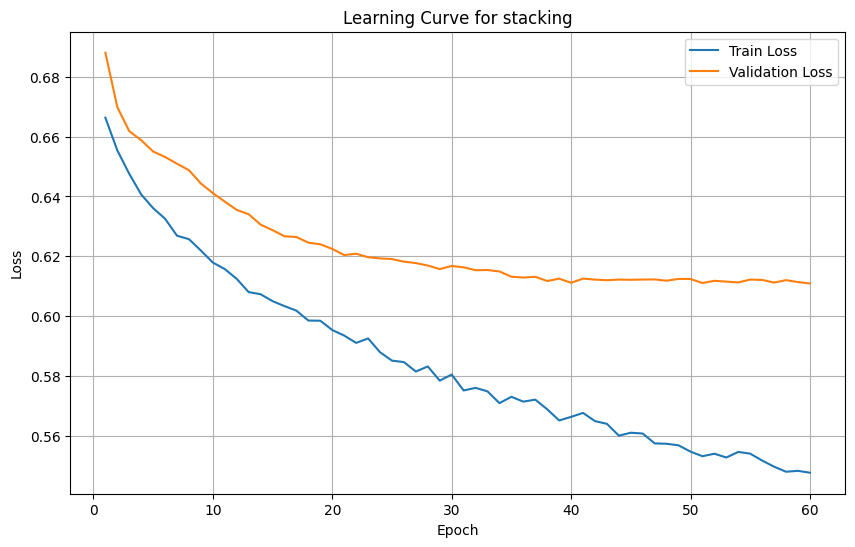

In [56]:
best_params=study.best_params
model = meta_model(input_dim=X_train_tensor.shape[1],
              dropout1=best_params["dropout1"],
              dropout2=best_params["dropout2"]).to(device)
# 最適化と訓練を実行
optimizer = optim.Adam(model.parameters(), lr=best_params["learning_rate"],weight_decay=best_params["weight_decay"])
criterion = nn.BCELoss()

num_epochs=60
train_losses = []
val_losses = []

model.train()
for epoch in range(num_epochs):
    epoch_train_loss = 0
    epoch_val_loss = 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch).squeeze()
        loss = criterion(outputs, y_batch.squeeze())
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}')

    if val_loader is not None:
        model.eval()  
        with torch.no_grad():
            for X_val, y_val in val_loader:
                X_val, y_val = X_val.to(device), y_val.to(device)
                val_outputs = model(X_val).squeeze()
                val_loss = criterion(val_outputs, y_val.squeeze())
                epoch_val_loss += val_loss.item()

        avg_val_loss = epoch_val_loss / len(val_loader)
        val_losses.append(avg_val_loss)
        model.train()  

    if val_loader is not None:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")
    else:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
if val_losses:
    plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for stacking')
plt.legend()
plt.grid()
plt.show()

Accuracy: 60.71%
Precision: 0.4815
Recall: 0.7156
F1 Score: 0.5756
Matthews Correlation Coefficient: 0.2511
Specificity: 0.5426


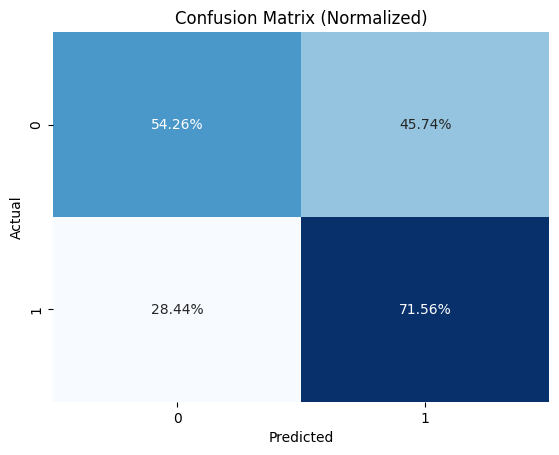

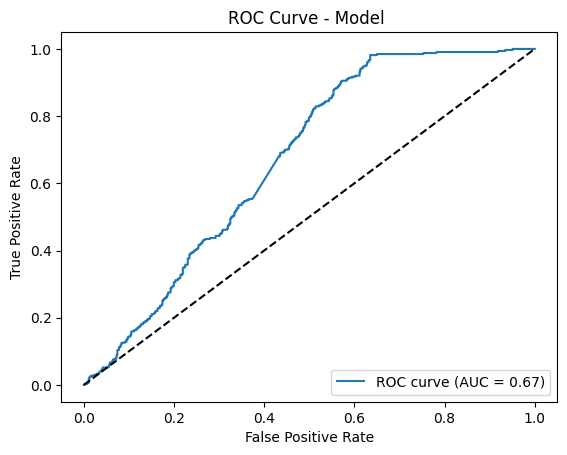

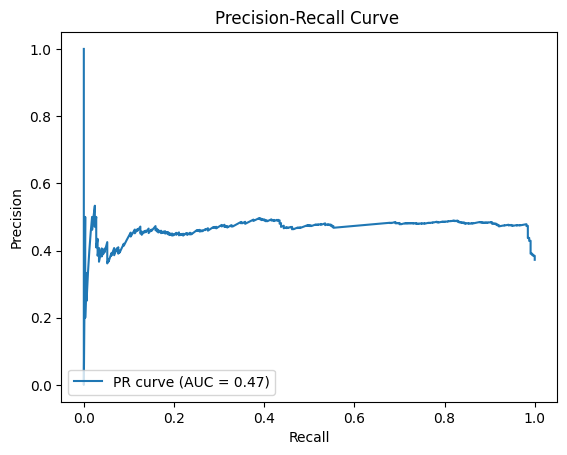

In [57]:
model.eval()
with torch.no_grad():
    X_test_tensor = X_test_tensor.to(device)
    y_test_tensor = y_test_tensor.to(device)

    # 予測と確率
    test_outputs = model(X_test_tensor).squeeze()
    predictions = (test_outputs >=0.5).float()
    y_true = y_test_tensor.cpu().numpy()
    y_pred = predictions.cpu().numpy()
    y_prob = test_outputs.cpu().numpy()

# 評価指標
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    mcc = matthews_corrcoef(y_true, y_pred)
    specificity = recall_score(y_true, y_pred, pos_label=0)  
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print(f'Matthews Correlation Coefficient: {mcc:.4f}')
    print(f'Specificity: {specificity:.4f}')

    # 混同行列（割合表示）
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(cm, annot=True, fmt=".2%", cmap="Blues", cbar=False)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix (Normalized)")
    plt.show()

    # ROC曲線とAUC
    fpr, tpr, thresholds = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - Model ')
    plt.legend(loc="lower right")
    plt.show()

    # Precision-Recall曲線
    precision_curve, recall_curve, pr_thresholds = precision_recall_curve(y_true, y_prob)
    pr_auc = auc(recall_curve, precision_curve)
    plt.plot(recall_curve, precision_curve, label=f'PR curve (AUC = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve ')
    plt.legend(loc="lower left")
    plt.show()    

In [ ]:
torch.save(model.state_dict(), 'model_params/stack_model_DNN.pth')